In [1]:
import pandas as pd
from pymongo import MongoClient
import sklearn

MONGOHOST = "localhost:27017"
MONGODB = "lod_notebook"

client = MongoClient(MONGOHOST)
db_connect = client[MONGODB]

cur = db_connect["area_data"].find()
df = pd.DataFrame(list(cur))

In [10]:
# row, col
df.shape

(4107, 39)

In [2]:
# 数値データを人口割りする
df_pp = pd.DataFrame()
for k, v in df.iteritems():
    try:
        #集計結果を人口あたりの値に変換する。この値はseriesとして返る
        s = df[k].astype(float)/df.total.astype(float)
        df_pp[k] = s
    except:
        df_pp[k] = df[k]
    df_pp["total"] = df["total"]
    
#  村など病院数などの値が取得できない=NaNとなるデータを今回は含めないようにします
df_pp = df_pp[df_pp.m_byoin.notnull()]
# エリアコードをURLから単純な文字列部分のみに変更します。
df_pp["_id"] = df_pp["_id"].map(lambda x: x[33:-9])
#  標準地域コードで市町村区名の取得出来ないデータも今回は含めないようにします。
df_pp = df_pp[df_pp.city.notnull()]

In [12]:
df_pp.shape

(1907, 39)

In [13]:
# 全く関係ないけど人口の男性がしめる割合をソートしてみて見た
df_pp.loc[:, ["male","pref", "city","total"]].sort_values("male")

,male,pref,city,total
0,NaN,北海道,池田町,7519
3,NaN,新潟県,北区,76953
4,NaN,北海道,倶知安町,15319
6,NaN,神奈川県,戸塚区,270897
8,NaN,沖縄県,与那原町,16247
10,NaN,栃木県,市貝町,11967
12,NaN,鹿児島県,出水市,55333
13,NaN,神奈川県,大井町,17901
15,NaN,熊本県,益城町,32618
18,NaN,北海道,新冠町,5721


In [3]:
# dataのStandarizationのために文字列のカラムをソートして先頭にはずしておきます
df_pp = df_pp.rename(columns={'_id':'_area','city':'_city', 'pref':'_pref'})
df_pp.sort_index(axis=1, inplace=True)
df_pp.fillna(0, inplace=True)
#df_pp.ix[:,3:] 
df_pp.sort_index(axis=1, inplace=True)

In [4]:
df_ns = df_pp

In [5]:
# 数値データを標準化
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
df_pp.ix[:,3:] = scale.fit_transform(df_pp.ix[:,3:])

In [24]:
# データをMinMaxScalerで正規化した場合
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
df_pp.ix[:,2:] = mms.fit_transform(df_pp.ix[:,2:])

In [6]:
# areacodeをindexにセット
df_pp.set_index('_area', inplace=True)

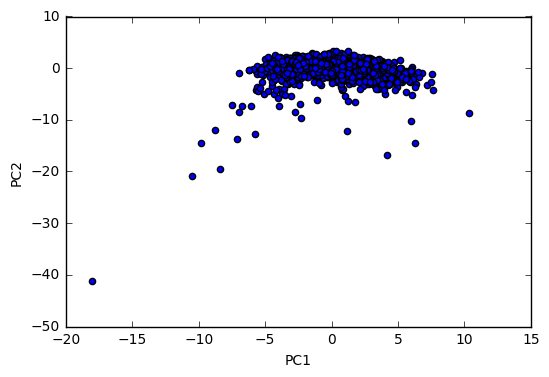

In [7]:
# 主成分分析
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_df = pd.DataFrame(pca.fit_transform(df_pp.ix[:,2:]), columns=('PC1', 'PC2'))
pca_df["area"] = df_pp.index
pca_df.plot(kind='scatter', x='PC1', y='PC2')

In [8]:
# dataframeをnumpy arrayへ変換。標準化した数値データのみ。
area_array = df_pp.ix[:,2:].as_matrix()

In [9]:
# k-measでクラスタリング。クラスタ数は１０。
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=12, max_iter=100000000).fit(area_array)

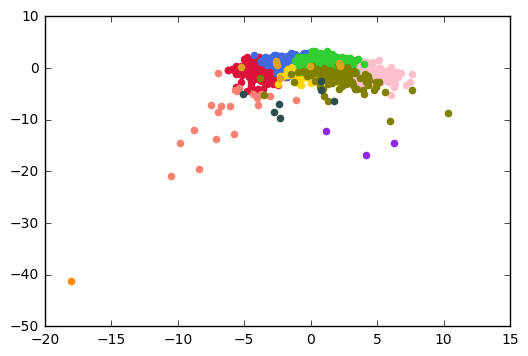

In [10]:
# PCAの結果をk-meansの結果でラベルしてプロット
import pylab as pl
pca0 = pca_df[k_means.labels_ == 0]
pca1 = pca_df[k_means.labels_ == 1]
pca2 = pca_df[k_means.labels_ == 2]
pca3 = pca_df[k_means.labels_ == 3]
pca4 = pca_df[k_means.labels_ == 4]
pca5 = pca_df[k_means.labels_ == 5]
pca6 = pca_df[k_means.labels_ == 6]
pca7 = pca_df[k_means.labels_ == 7]
pca8 = pca_df[k_means.labels_ == 8]
pca9 = pca_df[k_means.labels_ == 9]
pca10 = pca_df[k_means.labels_ == 10]
pca11 = pca_df[k_means.labels_ == 11]
pl.scatter(pca0['PC1'], pca0['PC2'], color='Crimson')
pl.scatter(pca1['PC1'], pca1['PC2'], color='RoyalBlue')
pl.scatter(pca2['PC1'], pca2['PC2'], color='DarkOrange')
pl.scatter(pca3['PC1'], pca3['PC2'], color='Gold')
pl.scatter(pca4['PC1'], pca4['PC2'], color='Pink')
pl.scatter(pca5['PC1'], pca5['PC2'], color='SkyBlue')
pl.scatter(pca6['PC1'], pca6['PC2'], color='BlueViolet')
pl.scatter(pca7['PC1'], pca7['PC2'], color='Salmon')
pl.scatter(pca8['PC1'], pca8['PC2'], color='LimeGreen')
pl.scatter(pca9['PC1'], pca9['PC2'], color='Olive')
pl.scatter(pca10['PC1'], pca10['PC2'], color='goldenrod')
pl.scatter(pca11['PC1'], pca11['PC2'], color='darkslategray')

In [20]:
df_ori = df
df_ori = df_ori.rename(columns={'_id':'_area','city':'_city', 'pref':'_pref'})
df_ori["_area"] = df_ori["_area"].map(lambda x: x[33:-9])
df_ori.set_index('_area', inplace=True)
df_ori = df_ori[df_ori.m_byoin.notnull()]
df_ori.fillna("-", inplace=True)
df_ori.to_json('data/area_data_36.json', orient='index', force_ascii=False)

#df_pp.ix[:, :2].to_json('data/area_name.json', orient='index', force_ascii=False)
# データのカテゴリ名を追加する
pca_df["cat"] = "l"
pca_df.to_json('data/pca_36.json', orient='records')



In [12]:
# カテゴリ毎にデータをfilterして、計算結果を出力する
# カテゴリは便宜的に医療・福祉・子育て・教育（m_*, c_*, e_*）、産業・仕事(i_*, w_*)の２つとする。人口比の数値で標準化するため、データには人口も含める
# !!!データフレームは標準化前のデータフレームを用いて別途StandardScalerを適用する!!!!!!
df_m_c_e = df_ns.ix[:, df_ns.columns.map(lambda x: x.startswith(('_', 'm_', 'c_', 'e_')))]
# df_m_c_e.shape
# => (1907, 20)
df_i_w = df_ns.ix[:, df_ns.columns.map(lambda x: x.startswith(('_', 'i_', 'w_')))]
# df_i_w.shape
# => (1907, 10)

scale = StandardScaler()
df_m_c_e.ix[:,2:] = scale.fit_transform(df_m_c_e.ix[:,2:])
df_i_w.ix[:,2:] = scale.fit_transform(df_i_w.ix[:,2:])

/usr/local/var/pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


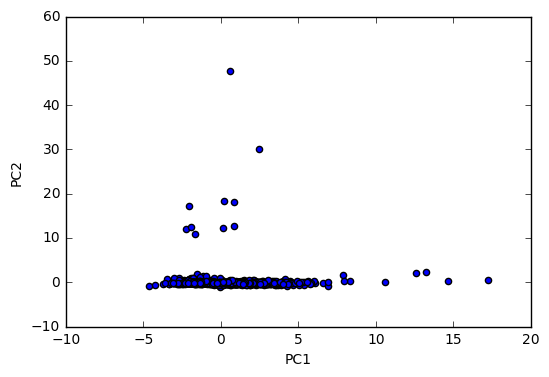

In [13]:
pca = PCA(n_components = 2)
pca_mce = pd.DataFrame(pca.fit_transform(df_m_c_e.ix[:,2:]), columns=('PC1', 'PC2'))
pca_mce["area"] = df_m_c_e.index
pca_mce.plot(kind='scatter', x='PC1', y='PC2')

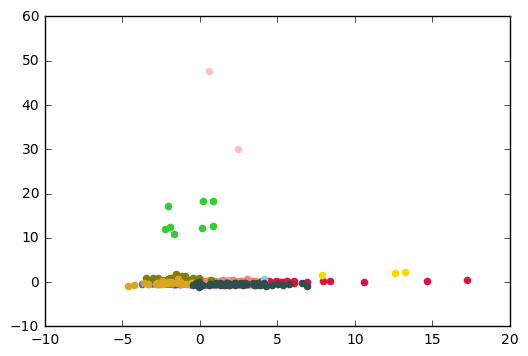

In [14]:
area_array = df_m_c_e.ix[:,2:].as_matrix()
k_means_mce = KMeans(n_clusters=12, max_iter=10000000).fit(area_array)

pca0 = pca_mce[k_means_mce.labels_ == 0]
pca1 = pca_mce[k_means_mce.labels_ == 1]
pca2 = pca_mce[k_means_mce.labels_ == 2]
pca3 = pca_mce[k_means_mce.labels_ == 3]
pca4 = pca_mce[k_means_mce.labels_ == 4]
pca5 = pca_mce[k_means_mce.labels_ == 5]
pca6 = pca_mce[k_means_mce.labels_ == 6]
pca7 = pca_mce[k_means_mce.labels_ == 7]
pca8 = pca_mce[k_means_mce.labels_ == 8]
pca9 = pca_mce[k_means_mce.labels_ == 9]
pca10 = pca_mce[k_means_mce.labels_ == 10]
pca11 = pca_mce[k_means_mce.labels_ == 11]
pl.scatter(pca0['PC1'], pca0['PC2'], color='Crimson')
pl.scatter(pca1['PC1'], pca1['PC2'], color='RoyalBlue')
pl.scatter(pca2['PC1'], pca2['PC2'], color='DarkOrange')
pl.scatter(pca3['PC1'], pca3['PC2'], color='Gold')
pl.scatter(pca4['PC1'], pca4['PC2'], color='Pink')
pl.scatter(pca5['PC1'], pca5['PC2'], color='SkyBlue')
pl.scatter(pca6['PC1'], pca6['PC2'], color='BlueViolet')
pl.scatter(pca7['PC1'], pca7['PC2'], color='Salmon')
pl.scatter(pca8['PC1'], pca8['PC2'], color='LimeGreen')
pl.scatter(pca9['PC1'], pca9['PC2'], color='Olive')
pl.scatter(pca10['PC1'], pca10['PC2'], color='goldenrod')
pl.scatter(pca11['PC1'], pca11['PC2'], color='darkslategray')

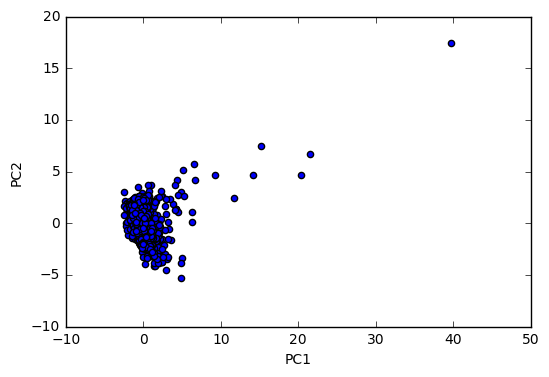

In [15]:
pca_iw = pd.DataFrame(pca.fit_transform(df_i_w.ix[:,2:]), columns=('PC1', 'PC2'))
pca_iw["area"] = df_i_w.index
pca_iw.plot(kind='scatter', x='PC1', y='PC2')

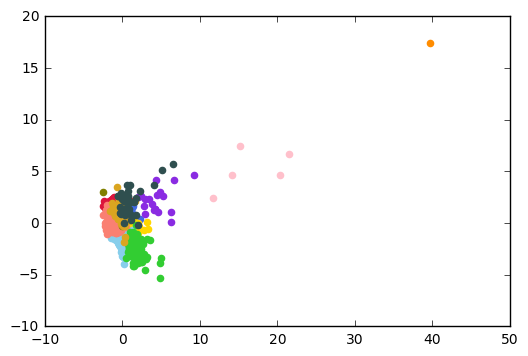

In [16]:
area_array = df_i_w.ix[:,2:].as_matrix()
k_means_iw = KMeans(n_clusters=12, max_iter=10000000).fit(area_array)

pca0 = pca_iw[k_means_iw.labels_ == 0]
pca1 = pca_iw[k_means_iw.labels_ == 1]
pca2 = pca_iw[k_means_iw.labels_ == 2]
pca3 = pca_iw[k_means_iw.labels_ == 3]
pca4 = pca_iw[k_means_iw.labels_ == 4]
pca5 = pca_iw[k_means_iw.labels_ == 5]
pca6 = pca_iw[k_means_iw.labels_ == 6]
pca7 = pca_iw[k_means_iw.labels_ == 7]
pca8 = pca_iw[k_means_iw.labels_ == 8]
pca9 = pca_iw[k_means_iw.labels_ == 9]
pca10 = pca_iw[k_means_iw.labels_ == 10]
pca11 = pca_iw[k_means_iw.labels_ == 11]
pl.scatter(pca0['PC1'], pca0['PC2'], color='Crimson')
pl.scatter(pca1['PC1'], pca1['PC2'], color='RoyalBlue')
pl.scatter(pca2['PC1'], pca2['PC2'], color='DarkOrange')
pl.scatter(pca3['PC1'], pca3['PC2'], color='Gold')
pl.scatter(pca4['PC1'], pca4['PC2'], color='Pink')
pl.scatter(pca5['PC1'], pca5['PC2'], color='SkyBlue')
pl.scatter(pca6['PC1'], pca6['PC2'], color='BlueViolet')
pl.scatter(pca7['PC1'], pca7['PC2'], color='Salmon')
pl.scatter(pca8['PC1'], pca8['PC2'], color='LimeGreen')
pl.scatter(pca9['PC1'], pca9['PC2'], color='Olive')
pl.scatter(pca10['PC1'], pca10['PC2'], color='goldenrod')
pl.scatter(pca11['PC1'], pca11['PC2'], color='darkslategray')

In [19]:
pca_mce

,PC1,PC2,area
0,0.244470,-0.265083,C01644
1,-0.982764,-0.086039,C15101
2,-2.495787,-0.183929,C01400
3,-2.241804,-0.080875,C14110
4,-1.161731,0.979279,C47348
5,-0.389050,0.019433,C09344
6,-0.381569,0.219790,C46208
7,-1.806535,-0.123821,C14362
8,-1.170902,1.443980,C43443
9,0.250281,0.014437,C01604


In [21]:
# 測度をカテゴリに分けて解析したDataFrameを保存

# pcaデータにカテゴリプロパティを追加する。！！！！！　=> カテゴリもbindしたオブジェクトから取得できる。
pca_mce["cat"] = "m"
pca_iw["cat"] = "w"
pca_mce.to_json('data/pca_mce.json', orient='records')
pca_iw.to_json('data/pca_iw.json', orient='records')

# ラベルしたデータ（array）をデータフレームに追加。
# area_name.jsonがdict型なので、areacodeで参照しやすいようにこれに追加して出力する
#  都道府県名、市町村区名のdataframeを生成し、さらにk-means.labels_のカラムを追加する。
area_dict = df_pp.ix[:, :2]
area_dict['l'] =k_means.labels_
area_dict['m'] = k_means_mce.labels_
area_dict['w'] = k_means_iw.labels_
area_dict.to_json('data/area_name.json', orient='index', force_ascii=False)